In [1]:
import gym
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from gym.envs.registration import register

C:\Users\CSH\Anaconda3\lib\site-packages\h5py\__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
register(
    id='FrozenLake-v3',
    entry_point='gym.envs.toy_text:FrozenLakeEnv',
    kwargs={'map_name':'4x4',
           'is_slippery':False}
)

In [51]:
env = gym.make('FrozenLake-v3')
env.render()


SFFF
FHFH
FFFH
HFFG


In [52]:
def one_hot(t):
    a = np.zeros(env.observation_space.n)
    a[t]=1
    return(a)

In [53]:
tf.reset_default_graph()
x = tf.placeholder(tf.float32, [1, 16])
w = tf.get_variable("w", shape=[16,4], 
                    initializer=tf.contrib.layers.xavier_initializer())
Y = tf.placeholder(tf.float32, [1,4]) # 2차원이야 여기서부터. 그래서 아웃풋도 2차원인거임 
Qpred = tf.matmul(x,w)
loss =  tf.reduce_sum(tf.square(Y - Qpred))
train = tf.train.GradientDescentOptimizer(learning_rate=0.1).minimize(loss)

In [58]:
dis = 0.99
num_episodes =2000
rList=[]

In [59]:
sess= tf.Session()
sess.run(tf.global_variables_initializer())

for i in range(num_episodes): 
    state=env.reset()
    rAll=0
    done=False
    e = 1.0/((i/50)+10) # 0.1 ~ 0.02 범위를 가짐 
    while not done:
        Q = sess.run(Qpred, feed_dict={x:np.reshape(one_hot(state),[1,16])}) # 이렇게하면 2차원 나온다. [1,4] 모양으로. 
        if np.random.rand(1)<e: # e-greedy로 해야한다. 노이즈로하면 x*w에 비해 숫자들이 너무 커서 학습이 반영이 안됨 . 
            action = env.action_space.sample()
        else:
            action= np.argmax(Q + np.random.randn(1,4)/(i+1)) # 왜 Q가 아니고 np.max(Q)로 돼잇엇지 ?? 수정해봣다 과연 ? ....... 아뭐야 여전히 0.05 
        new_state, reward, done, _= env.step(action)
        if not done: # 안끝났으면 
            Q[0,action] =  reward + dis * np.max(sess.run(Qpred, feed_dict={x:np.reshape(one_hot(new_state),[1,16])})) # new_state와 state 차이를 잘 구별해라 !!!! 
        else: # 끝났으면 
            Q[0,action] =  reward
        rAll +=reward 
        sess.run(train, feed_dict={x:np.reshape(one_hot(state),[1,16]), Y:Q}) # !!! 
        state = new_state
    rList.append(rAll) 
np.sum(rList)/num_episodes # success rate 
# 18/6/2 21:00 . 왜캐 구리게나오냐 .. 0.01 ~ 0.05 정도나옴 0.00 도 나오네 ... 
# 18/6/2 22:00.  noise 말고 e-greedy 쓰니까 94% 나온다. 아니 유투브에서는 50몇프로엿는데 또 왜이러케높아 ??? 

0.9435

In [38]:
len(rList)

2000

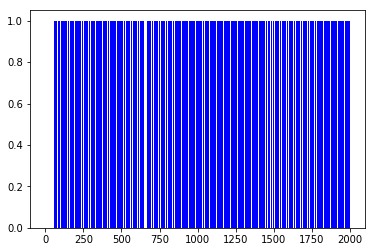

In [39]:
plt.bar(range(len(rList)), rList, color='blue')
plt.show()

In [45]:
env.reset()
env.render()


SFFF
FHFH
FFFH
HFFG


In [46]:
# Q-network가 잘 학습됏는지 확인해보자 
done = False
env.reset()
while not done:
    Q = sess.run(Qpred, feed_dict={x:np.reshape(one_hot(state),[1,16])})
    action= np.argmax(Q) 
    state, reward, done, _= env.step(action)
    env.render()

  (Up)
SFFF
FHFH
FFFH
HFFG
  (Down)
SFFF
FHFH
FFFH
HFFG
  (Down)
SFFF
FHFH
FFFH
HFFG
  (Right)
SFFF
FHFH
FFFH
HFFG
  (Right)
SFFF
FHFH
FFFH
HFFG
  (Down)
SFFF
FHFH
FFFH
HFFG
  (Right)
SFFF
FHFH
FFFH
HFFG
